# 서울 자치구별 인구당 공원면적

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving SeoulPark.csv to SeoulPark.csv


In [3]:
park_df = pd.read_csv(filename)
park_df.head()

,공원명,지역,경도,위도,면적,분류,크기
0,남산도시자연공원,중구,126.990377,37.550140,2896887.0,대형,15
1,길동생태공원,강동구,127.154779,37.540394,80683.0,소형,3
2,서울대공원,과천시,127.019846,37.426449,9132690.0,대형,15
3,서울숲,성동구,127.041798,37.543072,480994.0,중형,7
4,월드컵공원,마포구,126.878907,37.571805,2284085.0,대형,15


In [4]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving SeoulPopulationDensity.txt to SeoulPopulationDensity.txt


In [5]:
gu_df = pd.read_csv(filename, sep='\t')
gu_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
0,2020,합계,"9,911,088",605.23,"16,376"
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"


## 서울 자치구별 공원면적과 공원수

In [6]:
df = park_df.groupby('지역')[['면적']].agg(['sum','count'])
df

면적      
              sum count
지역                     
강남구    3626398.50     7
강동구    1526389.30     7
강북구    3714902.40     4
강서구    2194154.10     9
과천시    9132690.00     1
관악구   10431453.08     2
광진구     584002.00     2
구로구    1617657.00     4
금천구      57568.00     4
노원구   12024307.30     2
도봉구    1084218.00     6
동대문구    458663.70     4
동작구    3706739.10     7
마포구    2685112.70     5
서대문구   3321476.62     4
서초구   13359636.00     6
성동구     626838.70     5
성북구    1198327.00     3
송파구    2838992.80     7
양천구    1203428.50     5
영등포구    424446.00     5
용산구     247194.10     2
은평구    2986459.00     7
종로구    3907680.57    12
중구     2943303.80     4
중랑구    7078975.00     6

In [7]:
df.drop(index='과천시', inplace=True)
df.columns = ['공원면적', '공원수']
df.head()

,공원면적,공원수
지역,,
강남구,3626398.50,7
강동구,1526389.30,7
강북구,3714902.40,4
강서구,2194154.10,9
관악구,10431453.08,2


In [8]:
df.shape

(25, 2)

## 서울 자치구별 공원면적비율과 인당공원면적

In [9]:
gu_df.drop(index=0, inplace=True)
gu_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"
5,2020,광진구,"360,109",17.06,"21,105"


In [10]:
gu_df.set_index('지역', inplace=True)
gu_df

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",23.91,"6,649"
중구,2020,"134,635",9.96,"13,517"
용산구,2020,"244,645",21.87,"11,188"
성동구,2020,"300,505",16.86,"17,822"
광진구,2020,"360,109",17.06,"21,105"
동대문구,2020,"357,014",14.22,"25,114"
중랑구,2020,"399,562",18.50,"21,603"
성북구,2020,"447,056",24.58,"18,190"
강북구,2020,"311,569",23.60,"13,202"


In [11]:
df = df.join(gu_df[['인구', '면적']])
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398.50,7,"544,055",39.50
강동구,1526389.30,7,"463,998",24.59
강북구,3714902.40,4,"311,569",23.60
강서구,2194154.10,9,"585,901",41.44
관악구,10431453.08,2,"509,803",29.57


In [12]:
df['면적'] = df.면적 * 1000000
df['인구'] = df.인구.apply(lambda x: int(x.replace(',', '')))
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398.50,7,544055,39500000.0
강동구,1526389.30,7,463998,24590000.0
강북구,3714902.40,4,311569,23600000.0
강서구,2194154.10,9,585901,41440000.0
관악구,10431453.08,2,509803,29570000.0


In [13]:
df['면적비율'] = df.공원면적 / df.면적 * 100
df['인당면적'] = df.공원면적 / df.인구
df.head()

,공원면적,공원수,인구,면적,면적비율,인당면적
지역,,,,,,
강남구,3626398.50,7,544055,39500000.0,9.180756,6.665500
강동구,1526389.30,7,463998,24590000.0,6.207358,3.289646
강북구,3714902.40,4,311569,23600000.0,15.741112,11.923209
강서구,2194154.10,9,585901,41440000.0,5.294773,3.744923
관악구,10431453.08,2,509803,29570000.0,35.277149,20.461733


## 시각화

### 공원면적비율

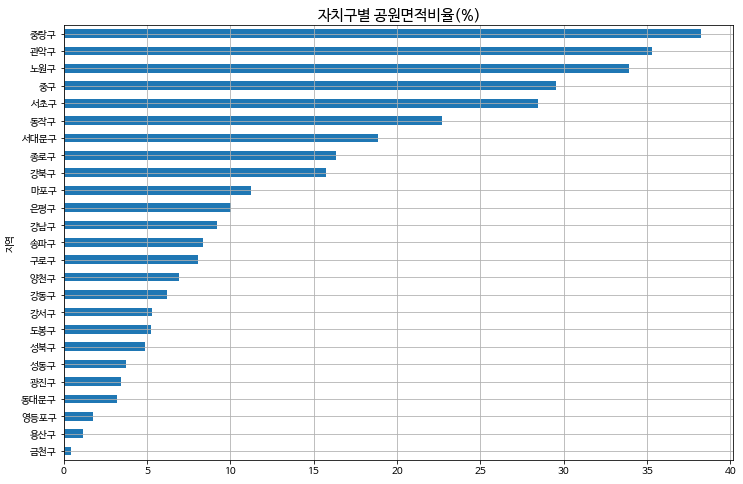

In [14]:
df.면적비율.sort_values().plot(kind = 'barh', grid = True, figsize = (12, 8))
plt.title('자치구별 공원면적비율(%)', size = 15)
plt.show()

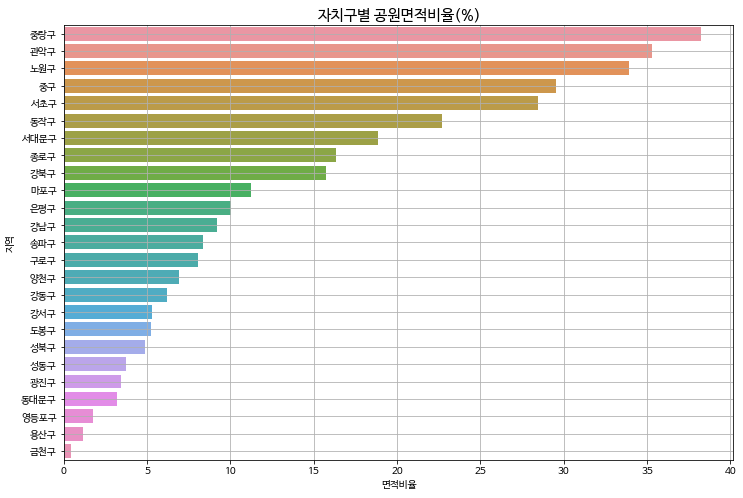

In [15]:
plt.figure(figsize=(12, 8))
order = df.면적비율.sort_values(ascending = False).index
sns.barplot(x = '면적비율', y = df.index, data = df, order = order)
plt.grid()
plt.title('자치구별 공원면적비율(%)', size = 15)
plt.show()

### 인당공원면적

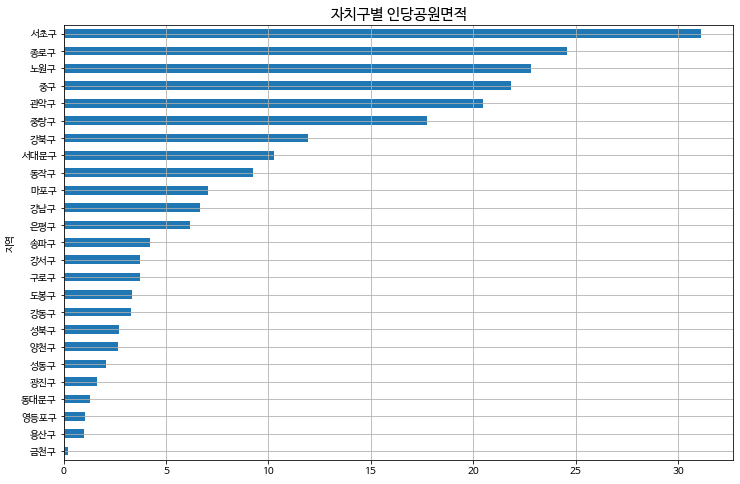

In [16]:
df.인당면적.sort_values().plot(kind = 'barh', grid = True, figsize = (12, 8))
plt.title('자치구별 인당공원면적', size = 15)
plt.show()

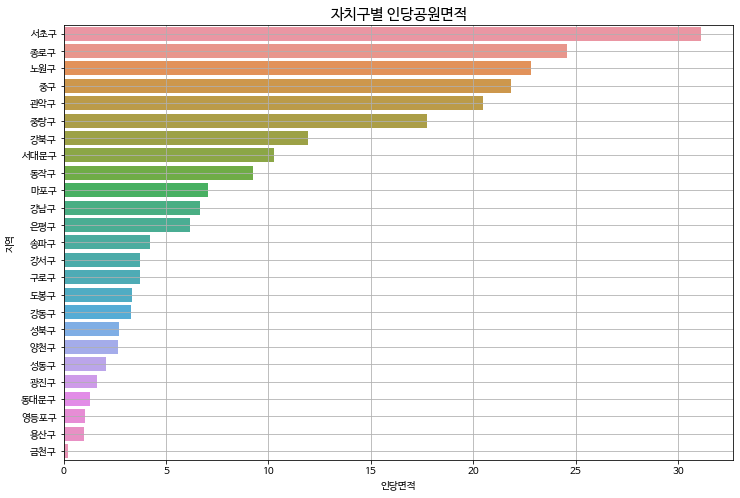

In [17]:
plt.figure(figsize=(12, 8))
order = df.인당면적.sort_values(ascending = False).index
sns.barplot(x = '인당면적', y = df.index, data = df, order = order)
plt.grid()
plt.title('자치구별 인당공원면적', size = 15)
plt.show()

In [18]:
df.to_csv('SeoulGuPark.csv')